# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
pd.options.display.max_columns = None
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

<div class="alert alert-info" role="alert">

1. данные склеились
2. `floors_total` тип данных `float64`
3. `is_apartment` тип данных `object`
4. `balcony` тип данных `float64`
5. `parks_around3000` тип данных `float64`
6. `parks_nearest` тип данных `float64`
7. `ponds_around3000` тип данных `float64`
8. `first_day_exposition` тип данных `object`
9. `ponds_nearest` тип данных `float64`
10. `days_exposition` тип данных `float64`
11. `cityCenters_nearest` тип данных `float64`
12. `airports_nearest` тип данных `float64`
13. во многих столбцах пропуски
14. повторы в названиях населённых пунктов


1. `ceiling_height` можно заполнить медианами высот потолков сгруппированных квартир по удаленности от центра, так как в центре будут преобладать старые здания, ближе к окраинам - многоэтажки, в соседних населенных пунктах пятиэтажки и везде своя высота потолка, пропуски из-за собственника жилья.
2. `floors_total` не заполнить, т.к. достоверно не узнать многоэтажность дома, пропуски из-за собственника жилья.
3. `living_area` можно заполнить медианами жилплощадей сгруппированных квартир по кол-ву комнат, пропуски из-за собственника жилья.
4. `is_apartment` можно заполнить 0, так как пропуск = не апартаменты, пропуски из-за собственника жилья.
5. `kitchen_area` можно заполнить медианами кухонных площадей сгруппированных квартир по общим площадям, пропуски из-за собственника жилья.
6. `balcony` можно заполнить 0, так как пропуск = нет балконов, пропуски из-за собственника жилья.
7. `locality_name` не заполнить, так как населенные пункты могут находиться на одном расстоянии от центра, пропуски из-за собственника жилья.
8. `airports_nearest` не заполнить, пропуски вызваны сбоями в работе сервиса.
9. `cityCenters_nearest` не заполнить, пропуски вызваны сбоями в работе сервиса.
10. `parks_around3000` можно заполнить 0, так как пропуск = нет парков, пропуски из-за собственника жилья.
11. `parks_nearest` не заполнить, пропуски вызваны сбоями в работе сервиса.
12. `ponds_nearest` не заполнить, пропуски вызваны сбоями в работе сервиса.
13. `ponds_around3000` можно заполнить 0, так как пропуск = нет водоёмов, пропуски из-за собственника жилья.
14. `days_exposition` не заполнить, лучше просто очистить или заполнить нулями и потом очитстить от аномалий (0 будут в аномалии), пропуски вызваны сбоями в работе сервиса.

все пропуски вызваны сервисом, если сделать все поля обязательными для заполнений - не будет пропусков от собственников.

</div>

### Шаг 2. Предобработка данных

In [2]:
data = (
    data
    .fillna({
        'balcony':0,
        'parks_around3000':0,
        'ponds_around3000':0,
        'is_apartment':False,
        'days_exposition':0,
    })
    .astype({
        'balcony':"int",
        'parks_around3000':"int",
        'ponds_around3000':"int",
        'first_day_exposition':"datetime64[ns]",
        'days_exposition':"int",
    })
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around

In [3]:
# (
# data[pd.notnull(data['living_area'])]
#     .pivot_table(index='rooms', values=['living_area', 'total_area'], aggfunc='median')
#     .query('0 <= rooms < 10 & rooms != 8')
# )

In [4]:
# living_nan = data[data['living_area'].isna()]
# living_nan['rooms'].unique()

In [5]:
# def living_nan(rooms, living_area):
#     if living_area != living_area / 1:
#         if rooms == 0:
#             return 18.000
#         if rooms == 1:
#             return 17.600
#         if rooms == 2:
#             return 30.500
#         if rooms == 3:
#             return 45.000
#         if rooms == 4:
#             return 63.800
#         if rooms == 5:
#             return 91.785
#         if rooms == 6:
#             return 123.900
#         if rooms == 7:
#             return 145.000
#         if rooms == 9:
#             return 179.200
#     else:
#         return living_area
# data['living_area'] = data.apply(lambda row: living_nan(row['rooms'], row['living_area']), axis=1)

In [6]:
data['living_area'] = (
    data['living_area']
    .fillna(data
        .groupby('rooms')['living_area']
        .transform('median')
    )
)


data['ceiling_height'] = (
    data['ceiling_height']
    .fillna(data
        .groupby('cityCenters_nearest')['ceiling_height']
        .transform('median')
    )
)
       


        

Решил заполнить пропуски в стобцах `balcony`, `parks_around3000`, `ponds_around3000`, `is_apartment`, так как вероятнее всего отсутствующее значение говорит, что нет балконов, нет парков, нет водоёмов и это не апартаменты, все эти данные объеденены тем, что введены пользователями вручную.

Поменял тип данных в стобцах, где отсутствуют пропуски и стоит тип `float` на `int`, поменял тип данных `first_day_exposition` на `datetime`.
Столбец `is_apartment` сам принял значение `bool` после очищения от `NaN`.

<div class="alert alert-info" role="alert">
    
Сделал свобдную таблицу по `data`, узнал медианные значения жилплощади для квартир с разным количеством комнат.
    
Узнал, сколько комнат в квартирах с пропусками.
    
Заполнил пропуски с помощью функции `living_nan` медианными значениями.
</div>

In [7]:
data[data['airports_nearest'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5542 entries, 5 to 23698
Data columns (total 22 columns):
total_images            5542 non-null int64
last_price              5542 non-null float64
total_area              5542 non-null float64
first_day_exposition    5542 non-null datetime64[ns]
rooms                   5542 non-null int64
ceiling_height          2966 non-null float64
floors_total            5532 non-null float64
living_area             5542 non-null float64
floor                   5542 non-null int64
is_apartment            5542 non-null bool
studio                  5542 non-null bool
open_plan               5542 non-null bool
kitchen_area            4825 non-null float64
balcony                 5542 non-null int64
locality_name           5534 non-null object
airports_nearest        0 non-null float64
cityCenters_nearest     24 non-null float64
parks_around3000        5542 non-null int64
parks_nearest           20 non-null float64
ponds_around3000        5542 non-null 

Обнаружилось совпадение - в столбцах `ponds_nearest`, `parks_nearest`, `cityCenters_nearest`, `airports_nearest` пропуски в одних и тех же строках

In [8]:
data = data[pd.notnull(data['locality_name'])] #очистил data от пропусков в столбце locality_name
data['locality_name'] = (
    data['locality_name']
    .str
    .lower() # приведение к нижнему регистру значений в столбце locality_name
)

In [9]:
def locality_lemm(locality_name):
    lemmas = m.lemmatize(locality_name)
    return lemmas

data['locality_name_filt'] = data['locality_name'].apply(locality_lemm)

Создал столбец `locality_name_filt`, в котором сохранил лемматизированные значения столбца `locality_name`

### Шаг 3. Посчитайте и добавьте в таблицу

In [10]:
data['price_per_meter2'] = (data['last_price'] / data['total_area']).round(2)
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_filt,price_per_meter2,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,0,"[санкт-петербург, \n]",120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81,"[поселок, , шушары, \n]",82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,"[санкт-петербург, \n]",92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,45.0,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,"[санкт-петербург, \n]",408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,"[санкт-петербург, \n]",100000.00,1,6,2018


Добавил стобцы `price_per_meter2`, `weekday`, `month`, `year`

In [11]:
result = []
def floor_namber(floor, floors_total):
    '''
    функция для заполнения столбца
    значениями первый, последний, другой
    на основании значений столбца 
    с этажами квартир
    '''
    if floor == 1:
        result = 'первый'
    elif floor == floors_total:
        result = 'последний'
    elif floors_total != floors_total / 1:
        result = np.nan
    else:
        result = 'другой'
    return result

data['floor_categories'] = data.apply(lambda row: floor_namber(row['floor'], row['floors_total']), axis=1)
data['floor_categories'].value_counts()

другой       17326
последний     3330
первый        2912
Name: floor_categories, dtype: int64

Создал столбец `floor_categories` и заполнил его значениями первый, последний, другой.

In [12]:
data['living_area_rate'] = (data['living_area'] / data['total_area']).round(2)
data['kitchen_area_rate'] = (data['kitchen_area'] / data['total_area']).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_filt,price_per_meter2,weekday,month,year,floor_categories,living_area_rate,kitchen_area_rate
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,0,"[санкт-петербург, \n]",120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81,"[поселок, , шушары, \n]",82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,"[санкт-петербург, \n]",92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,45.0,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,"[санкт-петербург, \n]",408176.10,4,7,2015,другой,0.28,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,"[санкт-петербург, \n]",100000.00,1,6,2018,другой,0.32,0.41


Добавил еще 2 столбца с соотношением жилой и площади кухни к общей площади.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

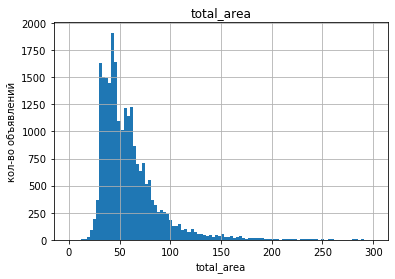

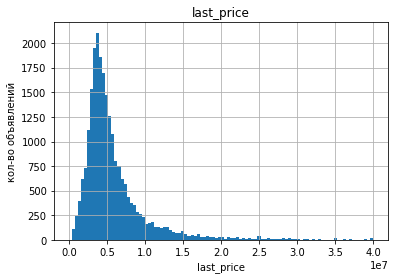

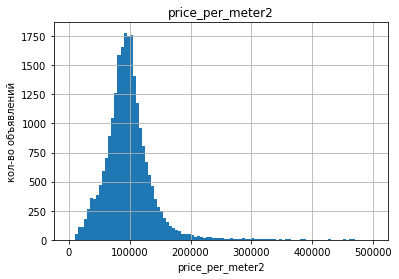

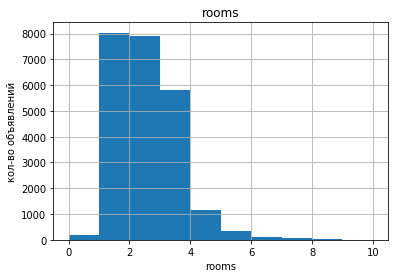

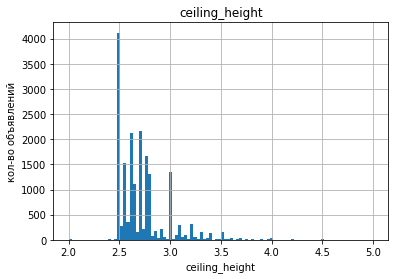

In [13]:
def hist_data(data, column, bins, range):
    data.hist(column, bins=bins, range=range)
    plt.xlabel(column)
    plt.ylabel("кол-во объявлений")

hist_data(data, 'total_area', 100, (0, 300))
hist_data(data, 'last_price', 100, (0, 40000000))
hist_data(data, 'price_per_meter2', 100, (0, 500000))
hist_data(data, 'rooms', 10, (0, 10))
hist_data(data, 'ceiling_height', 100, (2, 5))

На гистограммах видно, что больше всего объявлений о квартирах с площадью 30-60 кв.м, ценой от 3 до 6 млн, ценой квадратного метра от 70тыс до 120тыс, кол-вом комнат 1,2 или 3, и высотой потолков 2,5 метра.

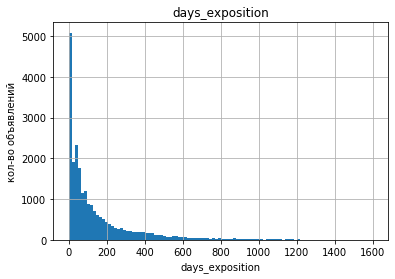

In [14]:
hist_data(data, 'days_exposition', 100, (0, 1600))

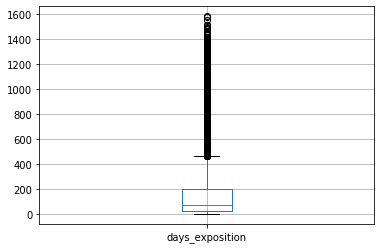

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [15]:
data.boxplot('days_exposition')
plt.show()
data['days_exposition'].describe()

0     3180
45     879
60     538
7      234
30     208
90     203
4      174
3      158
5      152
14     148
Name: days_exposition, dtype: int64
45.0    419
42.0    383
60.0    346
31.0    346
44.0    343
40.0    315
43.0    300
32.0    289
46.0    282
36.0    280
Name: total_area, dtype: int64
4500000.0    342
3500000.0    289
4000000.0    260
4300000.0    260
4200000.0    258
3600000.0    257
3300000.0    244
3800000.0    240
3200000.0    238
3700000.0    233
Name: last_price, dtype: int64
100000.00    261
83333.33      70
75000.00      58
125000.00     52
80000.00      52
66666.67      50
50000.00      48
90000.00      46
116666.67     40
93750.00      37
Name: price_per_meter2, dtype: int64
1    8036
2    7924
3    5797
4    1175
5     326
0     197
6     105
7      59
8      12
9       8
Name: rooms, dtype: int64
2.50    4103
2.70    2135
2.60    2005
2.75    1359
3.00    1335
2.80    1279
2.55    1243
2.65     905
3.20     318
3.10     277
Name: ceiling_height, dtype: int64


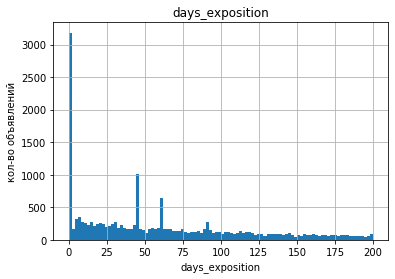

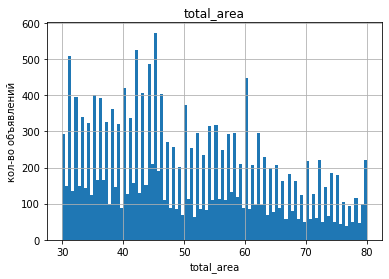

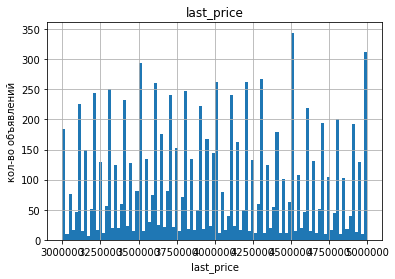

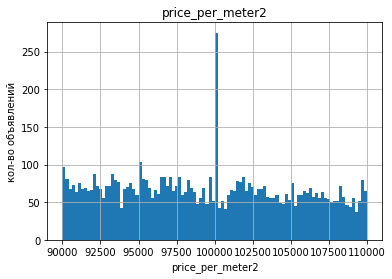

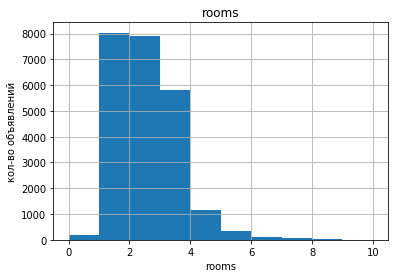

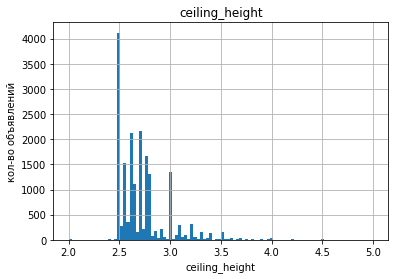

In [16]:
hist_data(data, 'days_exposition', 100, (0, 200))
print(data['days_exposition'].value_counts().head(10))
hist_data(data, 'total_area', 100, (30, 80))
print(data['total_area'].value_counts().head(10))
hist_data(data, 'last_price', 100, (3000000, 5000000))
print(data['last_price'].value_counts().head(10))
hist_data(data, 'price_per_meter2', 100, (90000, 110000))
print(data['price_per_meter2'].value_counts().head(10))
hist_data(data, 'rooms', 10, (0, 10))
print(data['rooms'].value_counts().head(10))
hist_data(data, 'ceiling_height', 100, (2, 5))
print(data['ceiling_height'].value_counts().head(10))

In [17]:
good_data = (
    data
    .query(
        '31 <= days_exposition <= 1100 and days_exposition != (45, 60, 90) and total_area != (45.0, 42.0, 60.0, 31.0, 44.0) and last_price != 4500000.0 and price_per_meter2 != 100000 and ceiling_height != 2.50'
    )
)

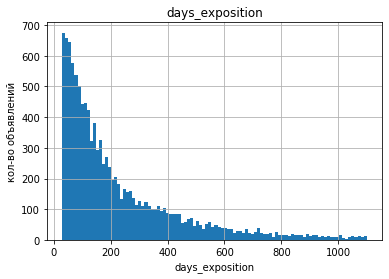

In [18]:
hist_data(good_data, 'days_exposition', 100, (30, 1100))

In [19]:
(23650 - 11399) / 23650

0.5180126849894292

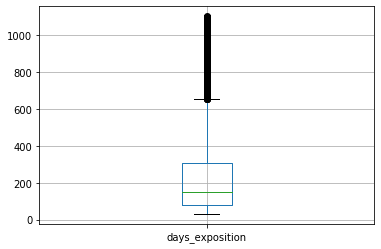

count    11399.000000
mean       228.160628
std        210.564830
min         31.000000
25%         78.000000
50%        151.000000
75%        308.000000
max       1100.000000
Name: days_exposition, dtype: float64

In [20]:
good_data.boxplot('days_exposition')
plt.show()
good_data['days_exposition'].describe()

In [21]:
good_data['locality_name'].value_counts().head(2)

санкт-петербург    7628
посёлок мурино      338
Name: locality_name, dtype: int64

In [22]:
data['locality_name'].value_counts().head(2)

санкт-петербург    15721
посёлок мурино       522
Name: locality_name, dtype: int64

<div class="alert alert-info" role="alert">

* Построив ящик с усами, обнаруживаю, что верхний ус на значении чуть меньше `500`, нижний упирается в ноль, это значит, что после 500 есть выбросы, но boxplot не даёт полной уверенности, что абсолютно все значения после 500 - выбросы, поэтому строю гистограмму и вижу, что после 800 дней квартиры почти не продаются, а после 1370 дней график сливается с 0. Приму за верхнюю границу значение `1100` дней, так как дольше квартиры продаются уже крайне редко, да и значений потеряется совсем немного `(163)`.

* Строю гистограмму по значениям от `0-200` и вижу, что выбросы присутствуют на значениях `0, 45, 60, 7, 30, 90`. Очищаю данные от этих выбросов.
    
* В теории в задании про АЗС мы посчитали правильным отбросить все заправки со временем менее 60 секунд. Здесь точно также я уверен, что невозможно продать квартиру менее, чем за 1 месяц или 30 дней. Отбрасываю и эти значения.
    
**Вывод:**
    
* мне пришлось отбросить `37%` данных, это очень большое количество и большинство объявлений ожидаемо из Санкт-Петербурга.
    
* как результат значения квартилей увеличились `22->77`, `73->147`, `198->300`, среднее также выросло `156->223`, а вот стандартное отклонение уменьшилось `213->207`. Также верхняя граница усов теперь поднялась выше `600`. 

</div>

<div class="alert alert-info" role="alert">

Теперь отсутствует 52% значений, значения квартилей увеличились `77->78`, `147->151`, `300->308`, среднее также выросло `223->228`, стандартное отклонение выросло `207->210`. Также верхняя граница усов теперь поднялась до `650`.

</div>

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.193504 -0.226853   -0.249548
last_price                     -0.193504    1.000000  0.364473    0.649021
rooms                          -0.226853    0.364473  1.000000    0.778354
total_area                     -0.249548    0.649021  0.778354    1.000000


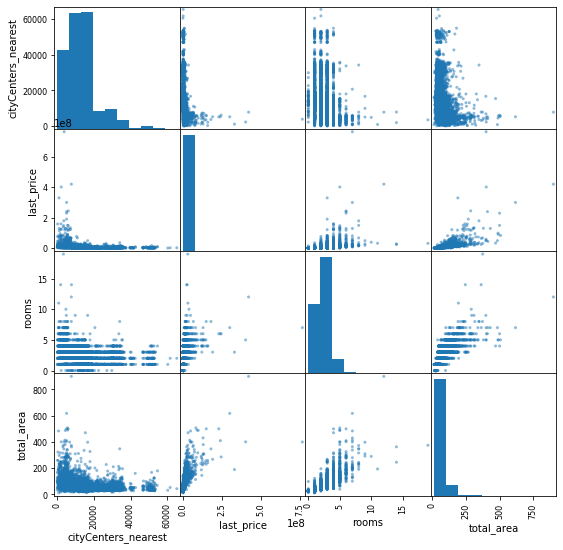

In [23]:
data_matrix = (
    good_data
    .pivot_table(index=good_data.index, values=['last_price', 'total_area', 'rooms', 'cityCenters_nearest'])
)
print(data_matrix.corr())
pd.plotting.scatter_matrix(data_matrix, figsize=(9, 9))
plt.show()

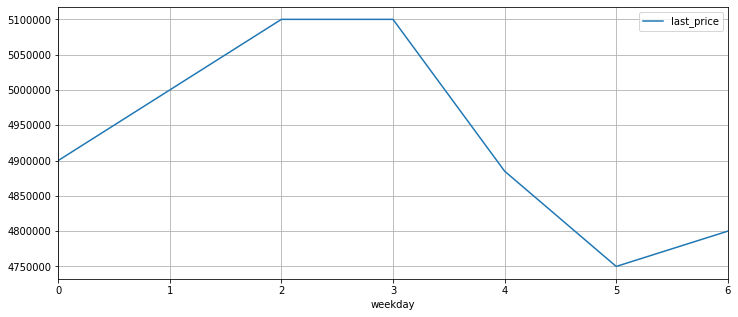

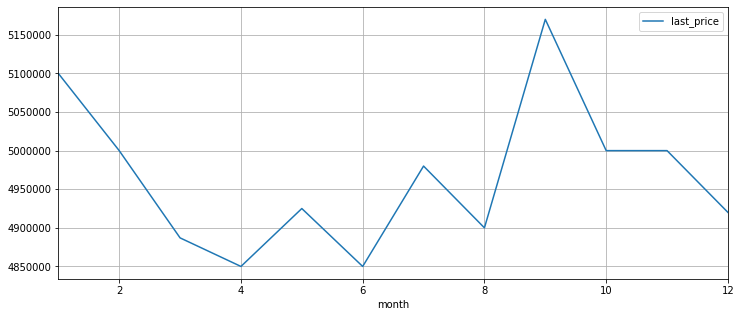

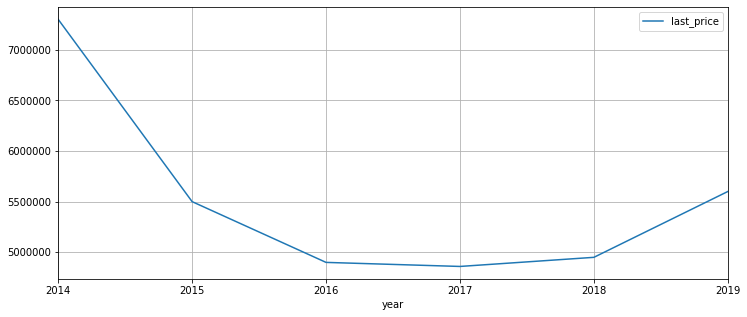

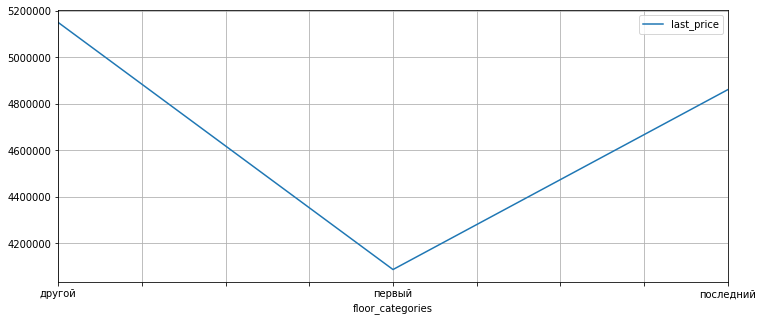

In [24]:
def plot(data, index, values, aggfunc):
    (data
        .pivot_table(index=index, values=values, aggfunc=aggfunc)
        .plot(grid=True, figsize=(12,5))
    )
    plt.show()

plot(good_data, 'weekday', 'last_price', 'median')
plot(good_data, 'month', 'last_price', 'median')
plot(good_data, 'year', 'last_price', 'median')
plot(good_data, 'floor_categories', 'last_price', 'median')

<div class="alert alert-info" role="alert">

**Влияние параметров на цену:**

1. удалённость от центра имеет небольшую отрицательную корреляцию `(-0,19)`, тоесть, чем больше расстояние, тем немного меньше цена.
2. количество комнат положительно коррелирует с  ценой, коэффициент `0,35`.
3. площадь квартиры и цена имеют сильную корреляцию с коэффициентом `0,65`.
4. медиана цены по дням недели показала, что максимальные цены регистрируются во вторник, минимум в воскресенье, разброс составляет `187 тыс.руб`.
5. по месяцам видно, что осенью-зимой цены выше, чем весной-летом. Разница составляет `250 тыс.руб`.
6. по годам видно, что максимум был в 2014 году, затем резкое понижение до 2017, и после 2017 цена опять растёт. Разброс `2300 тыс.руб`.
7. по категориям этажей видно, что наиболее предпочтительны этажи посередине, а первые этажи самые дешевые, наверно, из-за близости к подвалу. Странно. Мне казалось, что сверху и вид лучше и над головой стадо слонов не топает, быть может, люди боятся, что крыша начнет течь. Разброс `850 тыс.руб`.
    
**Вывод:**
абсолютно все параметры в той или иной степени оказывают влияние на стоимость квартир.
</div>

<div class="alert alert-info" role="alert">
 
Изменилось:

* корреляция с кол-вом комнат с `0.35` до `0.36`
* по дням : максимум в среду и четверг, минимум в субботу, разброс `350 тыс.руб`.
* по месяца самые дорогие - сентябрь и январь, минимум в апреле и июне, разброс `325 тыс.руб`.
* по годам изменился разброс `2350 тыс.руб`.
* по этажам разброс стал `1050 тыс.руб`.
    
Вцелом видно, что цена стала сильнее зависеть от параметров после фильтрации.
</div>

In [25]:
good_data['locality_name_filt'].value_counts().head(10) # топ 10 населённых пунктов

[санкт-петербург, \n]           7628
[поселок,  , муриный, \n]        369
[поселок,  , шушары, \n]         243
[всеволожск, \n]                 225
[деревня,  , кудрово, \n]        197
[поселок,  , парголовый, \n]     186
[пушкин, \n]                     158
[гатчина, \n]                    149
[колпино, \n]                    123
[выборг, \n]                     117
Name: locality_name_filt, dtype: int64

In [26]:
top_ten = ['санкт-петербург', 'поселок мурино', 'посёлок мурино', 
           'посёлок шушары', 'всеволожск', 'пушкин',
           'посёлок парголово', 'деревня кудрово',
           'колпино', 'гатчина', 'выборг']

In [27]:
top_ten_locality = good_data.query('@top_ten == locality_name') # срез по значениям top_ten
top_ten_locality = top_ten_locality.where(top_ten_locality != 'поселок мурино', 'посёлок мурино') # замена значений
top_ten_locality.pivot_table(index='locality_name', values='price_per_meter2').round(2)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,price_per_meter2
locality_name,
всеволожск,69962.67
выборг,56959.37
гатчина,67660.58
деревня кудрово,92512.04
колпино,75621.98
посёлок мурино,84953.95
посёлок парголово,89905.09
посёлок шушары,78031.41
пушкин,105839.70


Средняя стоимость квадратного метра в топ-10 населённых пунктах.

Максимальная средняя стоимость кв.метра в Санкт-Петербурге, минимальная - в Выборге.

In [28]:
top_ten_locality.pivot_table(index='locality_name', values='last_price', aggfunc=['max', 'min'])

,max,min
,last_price,last_price
locality_name,,
всеволожск,24412900.0,965780.0
выборг,8350000.0,600000.0
гатчина,12700000.0,850000.0
деревня кудрово,13000000.0,1800000.0
колпино,36900000.0,2100000.0
посёлок мурино,8500000.0,1730000.0
посёлок парголово,9140000.0,1800000.0
посёлок шушары,10100000.0,1500000.0


Также и максимальная стоимость кв.метра в Санкт-Петербурге, минимальная - в Выборге.

In [29]:
saint_petersburg_locality = good_data.query('"санкт-петербург" in locality_name')
saint_petersburg_locality = saint_petersburg_locality[pd.notnull(saint_petersburg_locality['cityCenters_nearest'])]

Избавился от `NaN` в столбце `cityCenters_nearest`

In [30]:
division = 0
def rounded(distance):
    '''
    фунция для перевода в км
    '''
    division = (distance / 1000)
    return division

saint_petersburg_locality['cityCenters_rounded'] = saint_petersburg_locality['cityCenters_nearest'].apply(rounded)
saint_petersburg_locality['cityCenters_rounded'] = saint_petersburg_locality['cityCenters_rounded'].astype('int')

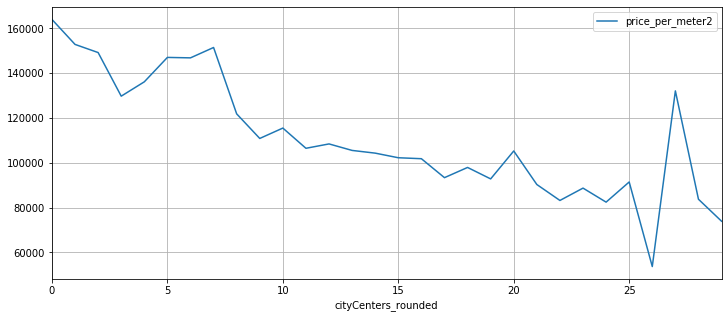

In [31]:
plot(saint_petersburg_locality, 'cityCenters_rounded', 'price_per_meter2', 'mean')

График меняется после 7-го километра.

In [32]:
central_flats = saint_petersburg_locality.query('cityCenters_rounded <= 7')

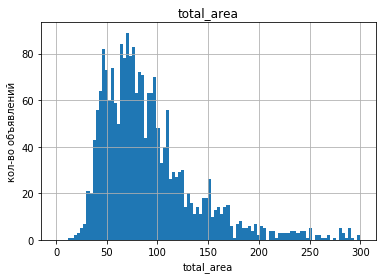

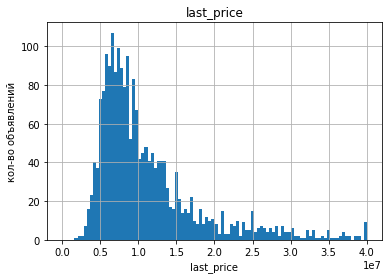

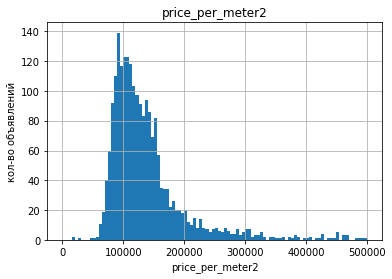

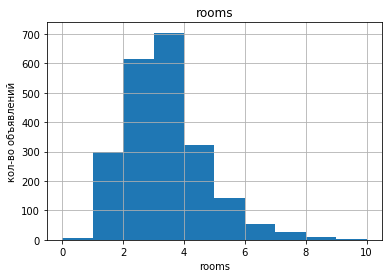

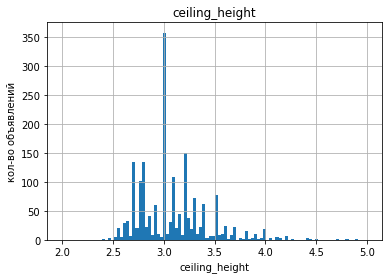

In [33]:
hist_data(central_flats, 'total_area', 100, (0, 300))
hist_data(central_flats, 'last_price', 100, (0, 40000000))
hist_data(central_flats, 'price_per_meter2', 100, (0, 500000))
hist_data(central_flats, 'rooms', 10, (0, 10))
hist_data(central_flats, 'ceiling_height', 100, (2, 5))

<div class="alert alert-info" role="alert">
    
**По data:**
На гистограммах видно, что больше всего объявлений о квартирах с площадью `30-60` кв.м, ценой от `3 до 6` млн, ценой квадратного метра от `70тыс до 120тыс`, кол-вом комнат `1,2 или 3`, и высотой потолков `2,5` метра.

**По central_flats:**
На гистограммах видно, что больше всего объявлений о квартирах с площадью `30-110` кв.м, ценой от `3 до 13` млн, ценой квадратного метра от `70тыс до 160тыс`, кол-вом комнат `2 и 3`, и высотой потолков `3` метра.

**Вывод:**
Данные для центра несколько отличаются от данных для всей таблицы, ожидаемо в бОльшую сторону.

Если нижние границы не были затронуты, то верхние были значительно пододвинуты: площадь квартиры `60->110`, цена `6->13`, цена кв.метра `120->160`, высота потолков `2,5->3`
</div>

                     cityCenters_rounded  last_price     rooms  total_area
cityCenters_rounded             1.000000   -0.025636 -0.174953   -0.091546
last_price                     -0.025636    1.000000  0.336398    0.651159
rooms                          -0.174953    0.336398  1.000000    0.738198
total_area                     -0.091546    0.651159  0.738198    1.000000


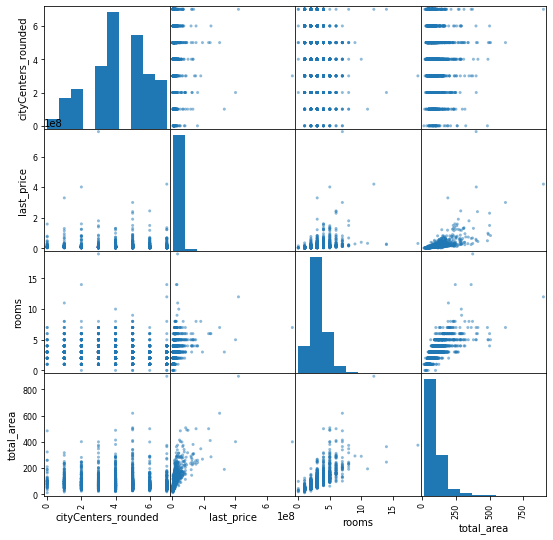

In [34]:
data_matrix = (
    central_flats
    .pivot_table(index=central_flats.index, values=['last_price', 'total_area', 'cityCenters_rounded', 'rooms'])
)
print(data_matrix.corr())
pd.plotting.scatter_matrix(data_matrix, figsize=(9, 9))
plt.show()

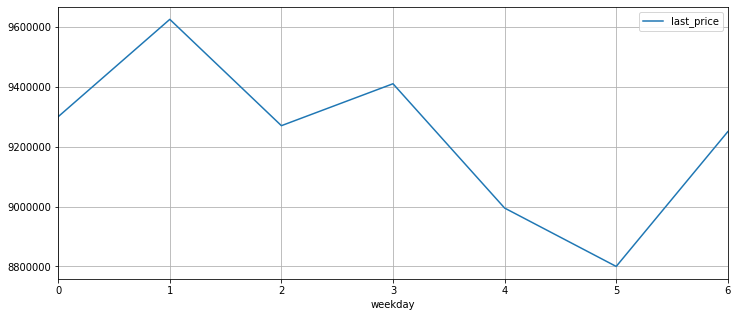

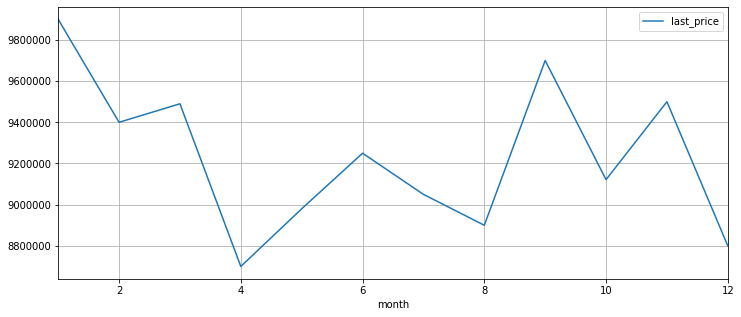

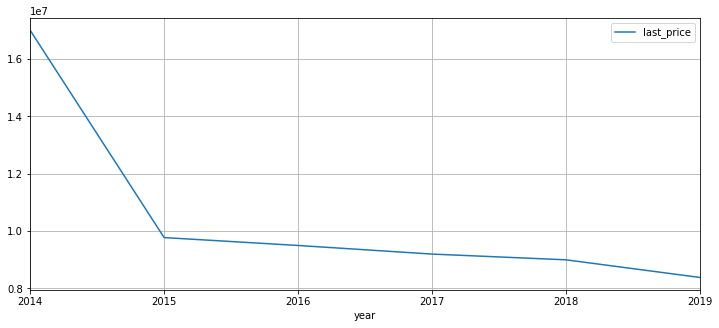

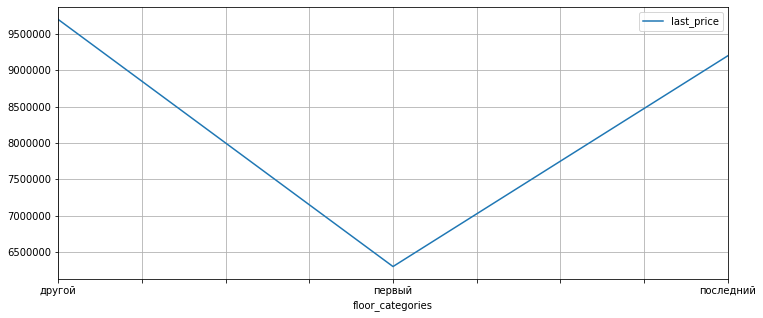

In [35]:
plot(central_flats, 'weekday', 'last_price', 'median')
plot(central_flats, 'month', 'last_price', 'median')
plot(central_flats, 'year', 'last_price', 'median')
plot(central_flats, 'floor_categories', 'last_price', 'median')

<div class="alert alert-info" role="alert">

**Влияние параметров на цену:**

1. удалённость от центра имеет небольшую отрицательную корреляцию `(-0,03)`, тоесть, чем больше расстояние, тем немного меньше цена. 
Было `-0,19`.
2. количество комнат положительно коррелирует с  ценой, коэффициент `0,34`.  
Было `0,35`.
3. площадь квартиры и цена имеют сильную корреляцию с коэффициентом `0,65`.  
Было `0,65`.
4. медиана цены по дням недели показала, что максимальные цены регистрируются в воскресенье, минимум в субботу, разброс составляет `1000 тыс.руб`.  
Было min воскресенье, max вторник, `187 тыс.руб`.
5. по месяцам видно, что осенью-зимой цены выше, чем весной-летом, но при этом минимум приходится на декабрь. Разница составляет `1100 тыс.руб`.  Было min весной-летом, max осенью-зимой, `250 тыс.руб`.
6. по годам видно, что максимум был в 2014 году, затем резкое понижение до 2015, и после 2015 идёт равномерное снижение цены. Разброс `9000 тыс.руб`.  
Было: максимум был в 2014 году, затем резкое понижение до 2017, и после 2017 цена опять растёт, `2300 тыс.руб`.
7. по категориям этажей видно, что наиболее предпочтительны этажи посередине, а первые этажи самые дешевые. Разброс `3150 тыс.руб`.  
Было: распределение цен выглядит так-же `850 тыс.руб`.
    
**Вывод:**
    
* заметна разница между областью и центром города: 
    
* по дням недели - восресенье из дня с минимальной ценой превратилось в день с максимальной ценой, 
    
* по месяцам - провал в весенне-летний период стал не таким ярко выраженным и появилось минимальное значение в декабре,
    
* по годам - пропало повышение к 2019 году и обвал случился раньше,
    
* по удалённости от центра - в центре города абсолютно нет вляния цены километража на цену.
    
Остальные параметры не изменились.
Ну и цены в центре в разы выше, чем в регионе.
</div>

<div class="alert alert-info" role="alert">
    
Изменения после фильтрации:
    
* по дням максимум во вторник, минимум в субботу, разброс `840 тыс.руб`.
* по месяцам минимум в апреле максимум в январе, разброс `1140 тыс.руб`.
* по годам разброс `8500 тыс.руб`.
* по категориям этажей разброс `3400 тыс.руб`.
    
в итоге  где-то разброс увеличился, где-то уменьшился.
    
**Данные по области:**
    
* по дням : максимум в среду и четверг, минимум в субботу, разброс `350 тыс.руб`.
* по месяца самые дорогие - сентябрь и январь, минимум в апреле и июне, разброс `325 тыс.руб`.
* по годам разброс `2350 тыс.руб`.
* по этажам разброс стал `1050 тыс.руб`.
    
</div>

### Шаг 5. Общий вывод

<div class="alert alert-info" role="alert">

**В ходе работы над проектом было установлено, что:**
1. в таблице очень много пропусков и лишь часть из них возможно заполнить.
2. часть типов данных не соответствовует столбцам.
3. в таблице содержится большое количество значений, которые трудно объяснить (квартиры, продающиеся быстрее 30 дней и медленнее 1100 дней.
4. большинство квартир - с площадью `30-60` кв.м, ценой от `3 до 6` млн, ценой квадратного метра от `70тыс до 120тыс`, кол-вом комнат `1,2 или 3`, и высотой потолков `2,5` метра.
5. данные по региону и по центру города отличаются друг от друга.
Если нижние границы не были затронуты, то верхние были значительно пододвинуты: площадь квартиры `60->110`, цена `6->13`, цена кв.метра `120->160`, высота потолков `2,5->3`
6. цена квартиры напрямую зависит от площади квартиры, количество комнат, удалённости от центра, категории этажа, а также дня, месяца и года выставления на продажу.
7. из 10 населенных пунктов с самым большим кол-вом объявлений максимальная средняя стоимость кв.метра в Санкт-Петербурге, минимальная - в Выборге.
8. центр Санкт-Петербурга находится в пределах 7 км радиуса, а сам город входит в радиус 29 км от центра.

</div>